In [2]:
!pip install scikit-learn

# 1- Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import re
nltk.download("stopwords")
nltk.download("punkt_tab")
stem = PorterStemmer()
stopwords  = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prabhsandhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/prabhsandhu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# 2- Importing Dataset

In [4]:
df = pd.read_csv("/Users/prabhsandhu/Real-Estate-Investment-Recommender-System/Artifacts/Datasets/realtor-data.zip.csv")
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


# 3- Exploring Dataset

In [5]:
df.sample(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1144151,75335.0,for_sale,3950000.0,4.0,5.0,0.22,1021203.0,Boulder,Colorado,80304.0,6706.0,2013-10-15
1873854,84400.0,sold,400000.0,4.0,3.0,0.37,199489.0,Saint Louis,Missouri,63141.0,2380.0,2022-01-18
2085345,22611.0,sold,474900.0,3.0,2.0,0.11,909725.0,Murrieta,California,92563.0,1262.0,2021-11-22
1756818,18695.0,sold,42500.0,NaN,NaN,0.47,1908502.0,Townsend,Tennessee,37882.0,NaN,2022-03-17
834302,19515.0,for_sale,110000.0,NaN,NaN,1.42,1866209.0,Alexandria,Minnesota,56308.0,NaN,NaN


In [6]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [7]:
df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [9]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [10]:
df.nunique()

brokered_by        110143
status                  3
price              102137
bed                    99
bath                   86
acre_lot            16057
street            2001358
city                20098
state                  55
zip_code            30334
house_size          12061
prev_sold_date      14954
dtype: int64

In [11]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

# 4- Preprocessing Data

# (A) - Handling and Managing Columns

In [12]:
df.drop(['brokered_by','street'],axis=1,inplace=True)
df

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,sold,350000.0,3.0,2.0,0.10,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,sold,440000.0,6.0,3.0,0.50,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,sold,179900.0,2.0,1.0,0.09,Richland,Washington,99354.0,933.0,2022-03-24


# (B) - Checking/Imputing Null Values

In [13]:
df.isnull().sum()

status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [14]:
# Performing Simple Imputation

In [15]:
imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df.iloc[:,2:3]= imputer.fit_transform(df.iloc[:,2:3])


imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df.iloc[:,3:4]= imputer.fit_transform(df.iloc[:,3:4])


imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
df.iloc[:,4:5]= imputer.fit_transform(df.iloc[:,4:5])

imputer = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df.iloc[:,-3:-2]= imputer.fit_transform(df.iloc[:,-3:-2])



In [16]:
imputer1 = SimpleImputer(missing_values=np.nan,strategy="median")
df.iloc[:,-2:-1] = imputer1.fit_transform(df.iloc[:,-2:-1])

In [17]:
df["prev_sold_date"] = pd.to_datetime(df["prev_sold_date"],errors="coerce")
df["prev_sold_date"] = df["prev_sold_date"].interpolate()

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

status            0
price             0
bed               0
bath              0
acre_lot          0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64

# (C) - Checking/Handling Duplicate Values

In [20]:
df.duplicated().sum()

np.int64(6988)

In [21]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# (D) - Checking/Removing Outliers

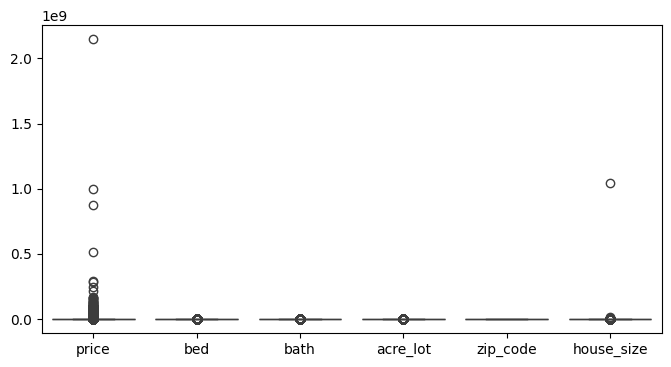

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(df)
plt.show()

In [23]:
df["price"]

411         76900.0
412         95000.0
413        245000.0
414         25000.0
415        289000.0
             ...   
2226377    359900.0
2226378    350000.0
2226379    440000.0
2226380    179900.0
2226381    580000.0
Name: price, Length: 2216030, dtype: float64

In [24]:

# Removing/Capping Outliers using IQR

In [25]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3-q1
iqr


upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
print(lower,upper)
df = df[df["price"]<upper]#171352

-410021.875 1126013.125


In [26]:
q1 = df["house_size"].quantile(0.25)
q3 = df["house_size"].quantile(0.75)
iqr = q3-q1
iqr


upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
print(lower,upper)


492.5 2968.5


# (E) Converting Data Types

In [27]:
df["bed"]=df["bed"].astype(int)
df["price"] = df["price"].astype(int)
df["bath"]=df["bath"].astype(int)
df["acre_lot"]=df["acre_lot"].astype(int)
df["zip_code"]=df["zip_code"].astype(int)
df["house_size"]=df["house_size"].astype(int)
df.drop('prev_sold_date',axis=1,inplace=True)

/var/folders/02/bqdg6sy929v6ddf025k87q7w0000gn/T/ipykernel_6699/1083210739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bed"]=df["bed"].astype(int)
/var/folders/02/bqdg6sy929v6ddf025k87q7w0000gn/T/ipykernel_6699/1083210739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df["price"].astype(int)
/var/folders/02/bqdg6sy929v6ddf025k87q7w0000gn/T/ipykernel_6699/1083210739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [28]:
df.head()

,status,price,bed,bath,acre_lot,city,state,zip_code,house_size
411,for_sale,76900,3,2,15,Canovanas,Puerto Rico,729,1200
412,for_sale,95000,3,1,0,Ponce,Puerto Rico,728,1100
413,for_sale,245000,4,3,0,Camuy,Puerto Rico,678,900
414,for_sale,25000,3,2,1,Lares,Puerto Rico,669,1760
415,for_sale,289000,3,2,65,Arecibo,Puerto Rico,612,1760


# (F) Encoding Text into Numericals

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Columns
categories = ['city', 'state', 'status']
numericals = ['price','bed','bath','acre_lot','zip_code','house_size']

df_encoded = df.copy()

# Label encode categorical fields instead of one-hot
for col in categories:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Scale numericals
scaler = MinMaxScaler()
df_encoded[numericals] = scaler.fit_transform(df_encoded[numericals])

# Final feature matrix (dense)
X = df_encoded[categories + numericals].to_numpy().astype("float32")

print("Feature shape:", X.shape)

Feature shape: (2044678, 9)


: 

In [ ]:
Sim = cosine_similarity(X)
Sim

# 6 Training a Model

In [1]:
def encode_input(house_dict):
    temp = house_dict.copy()
    
    # Encode categorical inputs
    for col in categories:
        temp[col] = label_maps[col].transform([temp[col]])[0]

    # Scale numerical inputs
    for col in numericals:
        temp[col] = scaler.transform([[temp[col] if col == key else 0 for key in numericals]])[0][numericals.index(col)]

    arr = np.array(list(temp.values()), dtype="float32").reshape(1, -1)
    return arr


In [2]:
from sklearn.metrics.pairwise import cosine_similarity

Sim = encode_input   # IMPORTANT!

def recommend(house_dict, k=5):
    q = Sim(house_dict)             
    sims = cosine_similarity(q, X)[0]
    top = sims.argsort()[::-1][:k]
    return df.iloc[top].copy(), sims[top]


In [3]:
new_house = {
    'city': 'Ponce',
    'state': 'Florida',
    'status': 'for_sale',
    'price': 96000,
    'bed': 3,
    'bath': 2,
    'acre_lot': 1,
    'zip_code': 728,
    'house_size': 1200
}

results, scores = recommend(new_house, k=3)

print("\n🏠 INPUT HOUSE:", new_house)
print("\n🔎 TOP 3 SIMILAR LISTINGS:\n")
print(results.assign(similarity=scores))

NameError: name 'categories' is not defined

In [ ]:
print(Sim)
print(type(Sim))
print(cosine_similarity)
print(type(cosine_similarity))


[[0.9999999  0.94381785 0.6893961  0.93657595 0.2435287 ]
 [0.94381785 1.0000001  0.5769553  0.94930714 0.0667487 ]
 [0.6893961  0.5769553  0.9999998  0.58189213 0.36921644]
 [0.93657595 0.94930714 0.58189213 1.         0.21674207]
 [0.2435287  0.0667487  0.36921644 0.21674207 1.        ]]
<class 'numpy.ndarray'>
<function cosine_similarity at 0x119418bf0>
<class 'function'>


# 7 Saving a Model

In [ ]:
import pickle
pickle.dump(())

TypeError: dump() missing required argument 'file' (pos 2)